In [57]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.mask import mask
from rasterio import plot
from rasterio.plot import show
import requests
import json
import plotly.graph_objects as go

%matplotlib inline

# Get the address

In [58]:
introduction_message = print("Due to connection problems please choose an address from the zones 1,3,7,22,43. Thank you for your understanding.")
postcode = input("Enter the postcode of the address and hit enter: ")
streetname = input("Enter the streetname of the address and hit enter: ")
house_number = input("Enter the house number of the address and hit enter: ")

Due to connection problems please choose an address from the zones 1,3,7,22,43. Thank you for your understanding.
Enter the postcode of the address and hit enter: 9260
Enter the streetname of the address and hit enter: Bohemen
Enter the house number of the address and hit enter: 101


In [59]:
#Double-check the address
print("Postcode: ", postcode)
print("Streetname: ", streetname)
print("House number: ", house_number)

Postcode:  9260
Streetname:  Bohemen
House number:  101


In [60]:
#Get a request from the API to get information about the object id of the single house entity
r = requests.get(
    "https://api.basisregisters.vlaanderen.be/v1/adresmatch", params={"postcode":int(postcode), "straatnaam":streetname, "huisnummer":int(house_number) }
)
house_info_nested = json.loads(r.content)
house_info_nested

{'adresMatches': [{'identificator': {'id': 'https://data.vlaanderen.be/id/adres/1555773', 'naamruimte': 'https://data.vlaanderen.be/id/adres', 'objectId': '1555773', 'versieId': '2016-01-28T10:15:07+01:00'}, 'detail': 'https://api.basisregisters.vlaanderen.be/v1/adressen/1555773', 'gemeente': {'objectId': '42026', 'detail': 'https://api.basisregisters.vlaanderen.be/v1/gemeenten/42026', 'gemeentenaam': {'geografischeNaam': {'spelling': 'Wichelen', 'taal': 'nl'}}}, 'postinfo': {'objectId': '9260', 'detail': 'https://api.basisregisters.vlaanderen.be/v1/postinfo/9260'}, 'straatnaam': {'objectId': '66426', 'detail': 'https://api.basisregisters.vlaanderen.be/v1/straatnamen/66426', 'straatnaam': {'geografischeNaam': {'spelling': 'Bohemen', 'taal': 'nl'}}}, 'huisnummer': '101', 'volledigAdres': {'geografischeNaam': {'spelling': 'Bohemen 101, 9260 Wichelen', 'taal': 'nl'}}, 'adresPositie': {'point': {'coordinates': [123321.93, 188067.28], 'type': 'Point'}}, 'positieSpecificatie': 'gebouweenheid

In [61]:
type(house_info_nested)

dict

In [62]:
house_info = pd.json_normalize(house_info_nested)

In [63]:
df = pd.json_normalize(house_info.adresMatches[0][0])
df

                                              detail huisnummer  \
0  https://api.basisregisters.vlaanderen.be/v1/ad...        101   

  positieSpecificatie positieGeometrieMethode adresStatus  officieelToegekend  \
0       gebouweenheid  aangeduidDoorBeheerder   inGebruik                True   

                               adresseerbareObjecten  score  \
0  [{'objectType': 'gebouweenheid', 'objectId': '...  100.0   

                              identificator.id  \
0  https://data.vlaanderen.be/id/adres/1555773   

              identificator.naamruimte  ... postinfo.objectId  \
0  https://data.vlaanderen.be/id/adres  ...              9260   

                                     postinfo.detail straatnaam.objectId  \
0  https://api.basisregisters.vlaanderen.be/v1/po...               66426   

                                   straatnaam.detail  \
0  https://api.basisregisters.vlaanderen.be/v1/st...   

  straatnaam.straatnaam.geografischeNaam.spelling  \
0                       

In [64]:
dff = pd.json_normalize(df.adresseerbareObjecten[0][0])
dff

,objectType,objectId,detail
0,gebouweenheid,19495522,https://api.basisregisters.vlaanderen.be/v1/ge...


In [65]:
dff.detail[0]

'https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/19495522'

In [66]:
house_info = pd.json_normalize(house_info_nested)
df = pd.json_normalize(house_info.adresMatches[0][0])
dff = pd.json_normalize(df.adresseerbareObjecten[0][0])

In [67]:
#Get a request from the API to get information about the object id of the building
r = requests.get(dff.detail[0])
house_gebouweenheden_nested = json.loads(r.content)
house_gebouweenheden_nested

{'identificator': {'id': 'https://data.vlaanderen.be/id/gebouweenheid/19495522', 'naamruimte': 'https://data.vlaanderen.be/id/gebouweenheid', 'objectId': '19495522', 'versieId': '2018-03-03T08:58:46+01:00'}, 'geometriePunt': {'point': {'coordinates': [123321.93, 188067.28], 'type': 'Point'}}, 'positieGeometrieMethode': 'aangeduidDoorBeheerder', 'gebouweenheidStatus': 'gerealiseerd', 'functie': 'nietGekend', 'gebouw': {'objectId': '19495503', 'detail': 'https://api.basisregisters.vlaanderen.be/v1/gebouwen/19495503'}, 'adressen': [{'objectId': '1555773', 'detail': 'https://api.basisregisters.vlaanderen.be/v1/adressen/1555773'}]}


In [68]:
house_gebouweenheden = pd.json_normalize(house_gebouweenheden_nested)
url_gebouwen = house_gebouweenheden['gebouw.detail'][0]

In [69]:
#Get a request from the API to get information about the polygon
r = requests.get(url_gebouwen)
house_gebouw_nested = json.loads(r.content)
house_polygon_nested = house_gebouw_nested["geometriePolygoon"]
house_polygon = house_polygon_nested.get('polygon')

In [70]:
house_polygon

{'coordinates': [[[123334.21554481983, 188081.20966860652],
   [123332.29189682007, 188082.01811660826],
   [123334.25260081887, 188086.7725486122],
   [123326.04229681194, 188090.1687726155],
   [123315.99212080985, 188066.10208459944],
   [123318.35896880925, 188065.11123659834],
   [123318.15698481351, 188064.60858059675],
   [123306.56479280442, 188069.49203659967],
   [123303.2328248024, 188061.17728459463],
   [123313.01330480725, 188057.09619659185],
   [123319.71455281228, 188054.27635658905],
   [123321.4337208122, 188053.55347659066],
   [123322.00293681026, 188053.31411658973],
   [123325.92018481344, 188062.6379565969],
   [123326.3372728154, 188062.46272459626],
   [123334.21554481983, 188081.20966860652]]],
 'type': 'Polygon'}

In [71]:
house_gebouw = pd.json_normalize(house_gebouw_nested)
house_polygon_list = house_gebouw['geometriePolygoon.polygon.coordinates'][0]

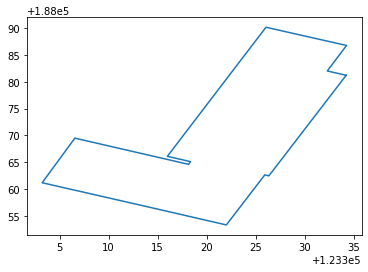

In [72]:
#Make a closed loop of the polygon
house_polygon_list[0].append((house_polygon_list[0])[0])

#Create lists of x and y values of the polygon
xs, ys = zip(*house_polygon_list[0]) #create lists of x and y values

#Plot the shape of the polygon to see what we can expect as the shape of the house
plt.figure()
plt.plot(xs,ys) 
plt.show()

In [73]:
#Create min and max x and y coordinates for the house
x_min_house = min(xs)
x_max_house = max(xs)
y_min_house = min(ys)
y_max_house = max(ys)

In [74]:
#Create the bounds of the zones
'''
It is important to notice that the file path seen here is the used file path in the local computer this code was produced. 
Please change this to your local folder and file names to be able to run the code.
'''
df_zone_bounds = pd.DataFrame(columns = ['xmin', 'ymin', 'xmax', 'ymax', 'zone'])
for zone in range(1,43):
    if zone < 10:
        if os.path.isfile('C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k0'+str(zone)+'.tif'):
            file = 'C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k0'+str(zone)+'.tif'
            raster = rasterio.open(file)
            xmin = raster.bounds.left
            ymin = raster.bounds.bottom
            xmax = raster.bounds.right
            ymax = raster.bounds.top
            bound = pd.DataFrame([[xmin, ymin, xmax, ymax, zone]], columns = ['xmin', 'ymin', 'xmax', 'ymax', 'zone'])
            df = pd.concat([df, bound])
    else:
        if os.path.isfile('C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k'+str(zone)+'.tif'):
            file = 'C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k'+str(zone)+'.tif'
            raster = rasterio.open(file)
            xmin = raster.bounds.left
            ymin = raster.bounds.bottom
            xmax = raster.bounds.right
            ymax = raster.bounds.top
            bound = pd.DataFrame([[xmin, ymin, xmax, ymax, zone]], columns = ['xmin', 'ymin', 'xmax', 'ymax', 'zone'])
            df = pd.concat([df, bound])

In [75]:
#Reset the index of teh dataframe
df.reset_index(drop=True, inplace=True)

In [76]:
#Compare the zone bounds with the house bounds to see if the house is in the zone
zone_bounds = df[(df['xmin']<x_min_house) & (df['xmax']>x_max_house) & (df['ymin']<y_min_house) & (df['ymax']>y_max_house)]

In [77]:
#Print the zone number of the house
zone_number = int(zone_bounds.zone.iloc[0])
print(zone_number)

22


In [78]:
#Mask and crop the DSM and DTM files from the zone
'''
It is important to notice that the file path seen here is the used file path in the local computer this code was produced. 
Please change this to your local folder and file names to be able to run the code.
'''
if zone_number < 10:
    if os.path.isfile('C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k0'+str(zone_number)+'.tif') and os.path.isfile('C:/Users/gulce/geoproject/k/DHMVIIDTMRAS1m_k0'+str(zone_number)+'.tif') :
        dsm_file = 'C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k0'+str(zone_number)+'.tif'
        with rasterio.open(dsm_file) as src_dsm:
            out_img_dsm, out_transform_dsm = rasterio.mask.mask(src_dsm, [house_polygon], crop=True)
            dsm = out_img_dsm[0]
        dtm_file = 'C:/Users/gulce/geoproject/k/DHMVIIDTMRAS1m_k0'+str(zone_number)+'.tif'
        with rasterio.open(dtm_file) as src_dtm:
            out_img_dsm, out_transform_dsm = rasterio.mask.mask(src_dtm, [house_polygon], crop=True)
            dtm = out_img_dtm[0]
else:
    if os.path.isfile('C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k'+str(zone_number)+'.tif') and os.path.isfile('C:/Users/gulce/geoproject/k/DHMVIIDTMRAS1m_k'+str(zone_number)+'.tif'):
        dsm_file = 'C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k'+str(zone_number)+'.tif'
        with rasterio.open(dsm_file) as src_dsm:
            out_img_dsm, out_transform_dsm = rasterio.mask.mask(src_dsm, [house_polygon], crop=True)
            dsm = out_img_dsm[0]
        dtm_file = 'C:/Users/gulce/geoproject/k/DHMVIIDTMRAS1m_k'+str(zone_number)+'.tif'
        with rasterio.open(dtm_file) as src_dtm:
            out_img_dtm, out_transform_dtm = rasterio.mask.mask(src_dtm, [house_polygon], crop=True)
            dtm = out_img_dtm[0]

In [79]:
#Calculate the masked Canopy Height Model of the address
chm_masked = dsm - dtm

In [80]:
print(type(chm_masked))

<class 'numpy.ndarray'>


In [81]:
print(chm_masked)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


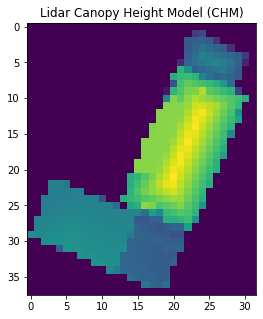

In [82]:
#Plot the 2D model of the house
fig, ax = plt.subplots(figsize=(10, 5))

chm_plot = ax.imshow(chm_masked)

ax.set_title("Lidar Canopy Height Model (CHM)")


plt.show()


In [83]:
#Plot the 3D model of the house
fig = go.Figure(data=go.Surface(z=chm_masked))

fig.update_scenes(yaxis_autorange="reversed")

fig.update_layout(title='3D Canopy Height Model')

fig.show()